In [1]:
#Importing the main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

/Users/priyambasu/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/priyambasu/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/priyambasu/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/priyambasu/Library/Python/3.7/lib/python/s

In [2]:
#Preventing any unnecessary verbose from popping up
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
#Getting the current directory of this iPynb file
os.getcwd()

'/Users/priyambasu/Desktop/CODE/ieee_comp/Sarcasm'

In [7]:
#loading the dataset, from the json file stored in the given directory below, and visualising it
data=pd.read_csv("/Users/priyambasu/Desktop/CODE/ieee_comp/data/final_dataset.csv")
data.head(20)

,Unnamed: 0,ID,tweet_id,text,missing_text,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose
0,0,0,1.052240e+18,New post (Domestic Violence Awareness Hasn't C...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,1.052210e+18,Domestic Violence Awareness Hasn’t Caught Up W...,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2,1.052180e+18,Mother Nature’s #MeToo https://t.co/nN3hbEHz85\n,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1.052160e+18,ption - no:2\n,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,4,1.052100e+18,It is 'high time' #MeToo named and shamed men ...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,5,5,1.052050e+18,“There's this idea that persistence involves s...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,6,6,1.052010e+18,ption - no:2\n,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,7,7,1.051990e+18,Meredith’s #MeToo moment on #TheOffice https:/...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,8,1.051980e+18,Interesting analysis by @TheEconomist about th...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,9,9,1.051940e+18,"What a shock hey, Old Bill is in the clear &am...",0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


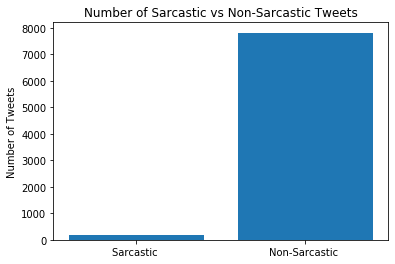

In [8]:
#Visualization
sarcastic=0
for i in range(len(data["Sarcasm"])):
    if data["Sarcasm"].iloc[i]==1:
        sarcastic+=1
normal=len(data["Sarcasm"])-sarcastic
label_values={"Sarcastic " : sarcastic, "Non-Sarcastic " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.title("Number of Sarcastic vs Non-Sarcastic Tweets")
plt.ylabel("Number of Tweets")
plt.show()

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical


num_words=20000
max_sentence_len=300
tokenizer=Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(list(data["text"]))
X=tokenizer.texts_to_sequences(list(data["text"]))
X=pad_sequences(X,maxlen=max_sentence_len)
Y=to_categorical(data["Sarcasm"].values)
print("The number of unique words in the text corpus dictionary : {}".format(len(tokenizer.word_index)))
print("The shape of the trainable data : {}".format(X.shape))
print("The shape of the labels for the data is : {}".format(Y.shape))

The number of unique words in the text corpus dictionary : 29816
The shape of the trainable data : (7978, 300)
The shape of the labels for the data is : (7978, 2)


In [13]:
embedding_words={}
file=open("/Users/priyambasu/Desktop/CODE/ieee_comp/glove.6B.300d.txt")
for line in file:
    #There are a number of lines containing embeddings for each word
    info=line.split(" ")
    #The first value in each line of the file is a unique word
    word=info[0]
    #The rest are embedding values of a specific dimension (to be displayed)
    embedding_values=np.array(info[1:],dtype="float32")
    #Storing these values
    embedding_words[word]=embedding_values
file.close()
print("The dimension/length of the embedding vector for each word is : {}"
     .format(len(embedding_words["go"])))

The dimension/length of the embedding vector for each word is : 300


In [14]:
from keras.layers import Embedding
from keras.initializers import Constant

#The length/dimension of the embedding vector was found to be 300 after running the previous cell
embedding_dim=len(embedding_words["go"]) #or simply 300
#Initialising the embedding matrix
embedding_matrix=np.zeros((num_words,embedding_dim))
#Forming the embedding matrix by using the embedding vectors for only those words in the text corpus of the data  
for word,i in tokenizer.word_index.items():
    if i>num_words:
        continue
    embedding_vector=embedding_words.get(word)
    if embedding_vector is not None:
        embedding_matrix[i]=embedding_vector

In [15]:
#Creating the embedding layer further with the help of keras
#These embeddings are made non-trainable as they are pre trained to highly optimized values
embeddings=Embedding(num_words,embedding_dim,embeddings_initializer=Constant(embedding_matrix),
                    input_length=max_sentence_len,trainable=False)
#Getting the shape of the embedding matrix (should be (num_words,embedding_dim)=(20000,300))
print("The shape of the embedding matrix is {}".format(embedding_matrix.shape))


The shape of the embedding matrix is (20000, 300)


In [29]:
#Building the model
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM, Bidirectional, Conv1D, MaxPooling1D 

model=Sequential()
model.add(embeddings)
model.add(Conv1D(32,3,activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128,return_sequences=True)))
model.add(Flatten())
model.add(Dense(30,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=[tf.keras.metrics.AUC()])

In [30]:
#Splittting the data into training and testing sets before fitting the model
#Using a 80% - 20% split for the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [31]:
batch_size=128 #Using a batch size of 128, during gradient descent
num_epochs=10 #Number of iterations/epochs over the training set

history=model.fit(x_train,y_train,batch_size=batch_size,epochs=num_epochs,validation_data=(x_test,y_test))


Train on 6382 samples, validate on 1596 samples
Epoch 1/10


NotFoundError: Resource localhost/true_positives_2/N10tensorflow3VarE does not exist.
	 [[{{node metrics_7/auc_2/AssignAddVariableOp}}]]

In [18]:
test_performance=model.evaluate(x_test,y_test)
print("The loss of the model on the test set : {}".format(test_performance[0]))
print("The accuracy of the model on the test set : {}%".format(test_performance[1]*100))



1596/1596 [==============================] - 5s 3ms/step
The loss of the model on the test set : 0.17396583135489532
The accuracy of the model on the test set : 97.61904764892464%


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          6000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 298, 32)           28832     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 149, 32)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 149, 32)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 149, 256)          164864    
_________________________________________________________________
flatten_1 (Flatten)          (None, 38144)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1144350   
__________

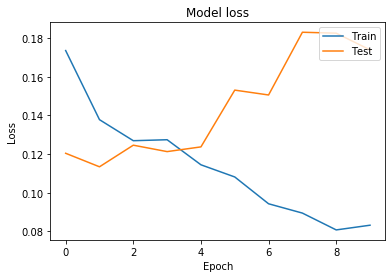

In [20]:
#Visualising the loss of the model, throughout the training process
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig("modelloss_sarcasmdetection.jpg")

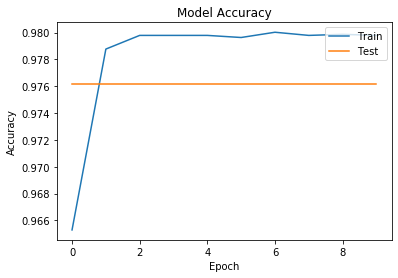

In [21]:
#Visualising the loss of the model, throughout the training process
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig("modelaccuracy_sarcasmdetection.jpg")